<a href="https://colab.research.google.com/github/Mousavisp/DL-w-PyTorch-4-Medical-Image/blob/main/5_ANN_Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn

# PyTorch Gradients

In [2]:
x = torch.tensor(2.0, requires_grad=True)

In [3]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y)
type(y)

tensor(63., grad_fn=<AddBackward0>)


torch.Tensor

backprop

In [4]:
y.backward()

slope of x=2, f(x)=63 is x.grad

(putting x=2 in f'(x) gives x.grad)

In [5]:
x.grad

tensor(93.)

In [6]:
x = torch.tensor([[1.,2.,3.],[3.,2.,1.]],requires_grad=True)

In [7]:
y = 3*x + 2
z = 2*y**2

print(y)
print(z)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)
tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [8]:
out = z.mean()
print(out)

tensor(140., grad_fn=<MeanBackward0>)


performing back-propagation to find the gradient of x with respect to $out$

In [9]:
out.backward()

solving the derivative of $z$ with the **chain rule**: $f(g(x)) = f'(g(x))g'(x)$

In [10]:
x.grad

tensor([[10., 16., 22.],
        [22., 16., 10.]])

# Linear Model

In [11]:
X = torch.linspace(1,50,50).reshape(-1,1)
e = torch.randint(-7,8, X.shape, dtype=torch.float)
y = 2*X + 3 + e

We can't plot a torch, so we need to change it to np

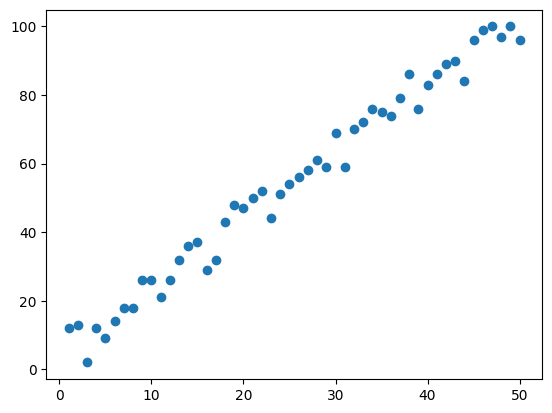

In [12]:
plt.scatter(X.numpy(), y.numpy());

In [13]:
model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.3553]], requires_grad=True)
Parameter containing:
tensor([-0.9208], requires_grad=True)


In [14]:
class Model(nn.Module):

    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)

    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [15]:
model = Model(1,1)

for name,param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 -0.8884897232055664
linear.bias 	 0.5110741853713989


In [16]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

In [17]:
epochs = 50
losses = list()

for i in range(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    losses.append(loss)
    print(f"epoch {i}, loss: {loss.item()}, weight: {model.linear.weight.item()}, bias: {model.linear.bias.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 1, loss: 7649.41748046875, weight: -0.8884897232055664, bias: 0.5110741853713989
epoch 2, loss: 3958.455078125, weight: 4.230221748352051, bias: 0.6650450229644775
epoch 3, loss: 2052.94384765625, weight: 0.552253782749176, bias: 0.5576536059379578
epoch 4, loss: 1069.19580078125, weight: 3.1948342323303223, bias: 0.6380533576011658
epoch 5, loss: 561.3193969726562, weight: 1.2960031032562256, bias: 0.5835207104682922
epoch 6, loss: 299.1192626953125, weight: 2.6602463722229004, bias: 0.6259375214576721
epoch 7, loss: 163.7530059814453, weight: 1.6799204349517822, bias: 0.5986930727958679
epoch 8, loss: 93.8664321899414, weight: 2.3842036724090576, bias: 0.6214997172355652
epoch 9, loss: 57.78477478027344, weight: 1.8780696392059326, bias: 0.6083423495292664
epoch 10, loss: 39.15546798706055, weight: 2.241638660430908, bias: 0.6210241317749023
epoch 11, loss: 29.536108016967773, weight: 1.9803128242492676, bias: 0.6151385307312012
epoch 12, loss: 24.568265914916992, weight: 2.167

In [ ]:
for i in range(epochs):
    losses[i]=losses[i].detach().numpy()

Text(0, 0.5, 'loss')

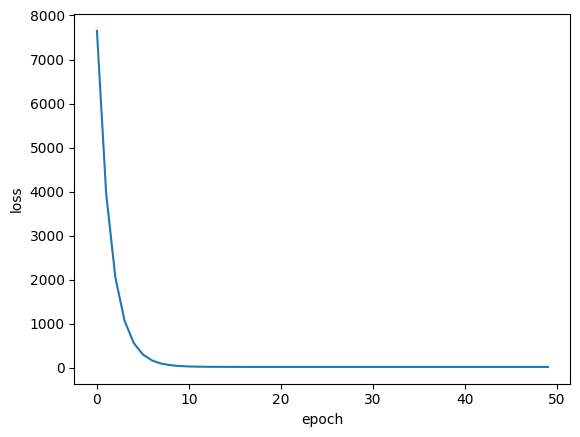

In [21]:
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')

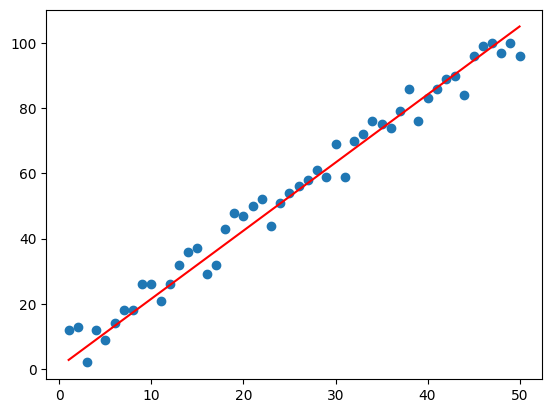

In [23]:
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*X + current_bias

plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), predicted_y, 'r')